# The Monte Carlo Module

In [ ]:
# A code block with your classes.
import pandas as pd
import numpy as np


class Die:
    '''A die has N sides, or “faces”, and W weights, and can be rolled to select a face.

       W defaults to 1.0 for each face but can be changed after the object is created.
       Note that the weights are just numbers, not a normalized probability distribution.
       The die has one behavior, which is to be rolled one or more times.
       Note that what we are calling a “die” here can represent a variety of random variables associated with stochastic processes, such as using a deck of cards or flipping a coin or speaking a language. 
       We can create these models by increasing the number of sides and defining the values of their faces. 
       Our probability models for such variables are, however, very simple – since our weights apply to only to single events, we are assuming that the events are independent.'''
    def __init__(self,faces):
        '''Initializer takes an array of faces as an argument.
        The array's data type (dtype) may be strings or numbers.
        The faces must be unique; no duplicates.
        Internally iInitializes the weights to 1.0 for each face.
        Saves faces and weights in a private dataframe that is to be shared by the other methods.'''
    
        self.faces = list(set(faces)) # array of strings or numbers
        self.weights =  [1.0 for self.face in range(len(self.faces))] # array of integers
        self.die = pd.DataFrame({'faces':self.faces, 'weights':self.weights}) #dataframe with faces and weights
    
        
    def change_weight(self,face_value,new_weight):
        '''This method is to change the weight of a single side.
        Takes two arguments: the face value to be changed and the new weight.
        Checks to see if the face passed is valid; is it in the array of weights?
        Checks to see if the weight is valid; is it a float? Can it be converted to one?'''
        self.checks = []
        if (type(face_value)==str or type(face_value)==int) and face_value in self.faces:
            self.checks.append(True)
#             print("Checks passed,valid face value and weight")
        else:
            self.checks.append(False)
            print("Face value should be array of strings or integer.  ")
            
        try:
            self.weight=float(new_weight)
            self.checks.append(True)
        except:
            print("Weight cannot be converted to float")
            self.checks.append(False)
        
        if self.checks:
            self.i = self.faces.index(face_value)
            self.weights[self.i] = new_weight
        else:
            print("Checks failed. Pass valid face value and weight")
            
        self.die = pd.DataFrame({'faces':self.faces, 'weights':self.weights})            
        return self.die
        
    def roll(self,num_roll=1):
        '''This method is to roll the die one or more times.
        Takes a parameter of how many times the die is to be rolled; defaults to 1.
        This is essentially a random sample from the vector of faces according to the weights.
        Returns a list of outcomes.
        Does not store internally these results.'''    
        return list(self.die.sample(n=num_roll,weights='weights',replace=True)['faces'])
         
    def show(self):
        '''This method is to show the user the die’s current set of faces and weights (since the latter can be changed).
        Returns the dataframe created in the initializer but possibly updated by the weight changing method.'''
        return self.die
    
    
    
class Game:
    '''Game class consists of rolling of one or more dice of the same kind one or more times.
       Each game is initialized with a list of one or more of similarly defined dice (Die objects).
       By “same kind” and “similarly defined” we mean that each die in a given game has the same number of sides and set of faces, but each die object may have its own weights.
       The class has a behavior to play a game, i.e. to roll all of the dice a given number of times.
       The class keeps the results of its most recent play.'''
    
    
    def __init__(self,dice):
        '''Takes a single parameter, a list of already instantiated similar Die objects.'''
        self.dice = dice
    
    def play(self,num_roll):
        '''Takes a parameter to specify how many times the dice should be rolled. Saves the result of the play to a private dataframe of shape N rolls by M dice.
        That is, each role is an observation and each column is a feature. Each cell should show the resulting face for the die on the roll. Note that this table is in wide form.
        The private dataframe should have the roll number is a named index.'''
        self.num_roll = num_roll
        self.play_result = pd.DataFrame()
        n=1
        for die in self.dice:
            self.result = die.roll(num_roll)
            self.play_result['Die'+str(n)] = self.result
            n+= 1
        
        self.play_result['Roll']=list(np.arange(1,num_roll+1))
        self.result_df = self.play_result.set_index('Roll')
        return self.result_df
            
    def show(self,df_form='wide'):
        '''This method just passes the private dataframe to the user.
        Takes a parameter to return the dataframe in narrow or wide form.
        This parameter defaults to wide form, which is what the previously described method produces.
        This parameter should raise an exception if the user passes an invalid option.
        The narrow form of the dataframe will have a two-column index with the roll number and the die number, and a single column for the face rolled.'''
        
        self.df_form = df_form
        if self.df_form == 'wide':
#             print("wide")
            self.df_to_return = self.result_df
        elif df_form == 'narrow':   
            self.df_to_return = self.result_df.stack().to_frame('Face')
        else:
            raise Exception("Dataframe form should be wide or narrow")
        return self.df_to_return
    
    
class Analyzer:
    def __init__(self,game):
        '''An analyzer takes the results of a single game and computes various descriptive statistical properties about it.
        A face counts per roll, i.e. the number of times a given face appeared in each roll. 
        For example, if a roll of five dice has all sixes, then the counts for this roll would be 6 for the face value '6' and 0 for the other faces. 
        A jackpot count, i.e. how many times a roll resulted in all faces being the same, e.g. six ones for a six-sided die. 
        A combo count, i.e. how many combination types of faces were rolled and their counts. 
        A permutation count, i.e. how may sequence types were rolled and their counts.'''
        self.game = game
    
    def face_counts_per_roll(self):
        '''A face counts per roll method to compute how many times a given face is rolled in each event.
        Stores the results as a dataframe in a public attribute.
        The dataframe has an index of the roll number and face values as columns (i.e. it is in wide format).'''
        face_counts_per_roll = pd.DataFrame()
        for i in range(len(self.game)):
            each_roll = pd.DataFrame(self.game.iloc[i].value_counts()).transpose()
            face_counts_per_roll = face_counts_per_roll.append(each_roll)
        face_counts_per_roll.index.name = 'Game'
        return face_counts_per_roll
    
    def combo(self):
        '''A combo method to compute the distinct combinations of faces rolled, along with their counts.
        Combinations should be sorted and saved as a multi-columned index.
        Stores the results as a dataframe in a public attribute.'''
        self.combo_results = pd.DataFrame()
        for i in range(len(self.game)):
            self.combo_results = self.combo_results.append(pd.DataFrame(self.game.iloc[i].value_counts()).transpose())
            self.combo_results.index.name = "Roll"
        return self.combo_results
                                     
    
    def jackpot(self):
        '''A jackpot method to compute how many times the game resulted in all faces being identical.
        Returns an integer for the number times to the user.
        Stores the results as a dataframe of jackpot results in a public attribute.
        The dataframe should have the roll number as a named index.'''
        jackpot_results = pd.DataFrame()
        analyzer = Analyzer(self.game)
        self.combo_results = analyzer.combo()
        for i in range(len(self.combo_results)):
            if self.combo_results.iloc[i].count()==1:
                jackpot_results = jackpot_results.append(self.combo_results.iloc[i])
        all_faces_identical = len(jackpot_results)
        return all_faces_identical
          

# Test Module

In [2]:
# A code block with your test code.
import unittest
import numpy as np

import pkg_mc
from imp import reload
reload(pkg_mc)
from pkg_mc.montecarlo import *

class MonteCarloTestSuite(unittest.TestCase):
    def test_test(self):
        self.assertTrue(True)
        
    # 'test_1_change_weight()': Change weight of a face in list of faces.
    # 'test_2_roll_die()': Roll die 2 times and store results in dataframe
    # 'test_3_die_show()': Show faces of die
    # 'test_4_game_play()': Play game twice and see results
    # 'test_5_face_counts()': Count faces of game
    # 'test_6_combo()': Verify if the combos are summed
    # 'test_7_jackpot()': Verify jackpot results are correct

    
    def test_1_die_change_weight(self):
        # Change weight of a face
        faces_list = [2,3,4,5]
        mc_change_weight = Die(faces_list)
        df = mc_change_weight.change_weight(2,6)
        assert (df['weights'][0] == 6)
        
    def test_2_die_roll(self):
        # Roll die 2 times and store results in dataframe
        faces_list = [2,3,4,5]
        die = Die(faces_list)
        roll_list = die.roll(2)
        assert (len(roll_list) == 2)
        
    def test_3_die_show(self):
        # Roll die 2 times and store results in dataframe
        faces_list = [2,3,4,5]
        die = Die(faces_list)
        df = die.show()
        assert (len(df) == 4)
                  
    def test_4_game_play(self):
        # Play game and store the results in a wide dataframe
        faces_list = [1,2,3,4,5]
        die1 = Die(faces_list)
        die2 = Die(faces_list)
        dice_list = [die1,die2]
        game = Game(dice_list)
        game_play = game.play(4)
        game.show("wide")
        assert len(game_play)==4
               
    def test_5_face_counts(self):
        # Count faces of game
        df = pd.DataFrame({'Game':[1,2,3,4], 'die1':[2,6,4,7], 'die2':[4,8,4,2], 'die3':[1,5,4,6]})
        df = df.set_index('Game')
        analyze = Analyzer(df)
        face_counts = analyze.face_counts_per_roll()
        assert (face_counts.iloc[3][6] ==1)
      
    def test_6_combo(self):
        # Verify if the combos are summed
        df = pd.DataFrame({'Game':[1,2,3,4], 'die1':[2,6,4,7], 'die2':[4,8,4,2], 'die3':[1,5,4,6]})
        df = df.set_index('Game')
        analyze = Analyzer(df)
        game_combo = analyze.combo()
        assert (game_combo.iloc[2][4] == 3)
        
    def test_7_jackpot(self):
        #Verify jackpot results are correct
        df = pd.DataFrame({'Game':[1,2,3,4], 'die1':[2,6,4,7], 'die2':[4,8,4,2], 'die3':[1,5,4,6]})
        df = df.set_index('Game')
        analyze = Analyzer(df)
        game_combo = analyze.jackpot()
        assert (game_combo == 1)

# Test Results

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

Scenario 1: 2-headed coin

Create one fair coin (with faces H and T) and one unfair coin. For the unfair coin, give one of the faces a weight of 5 and the others 1.
Play a game of 1000 flips of three coins with all fair dice.
Play a game of 1000 flips with two unfair dice and one fair die.
For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.
Compute relative frequency as the number of jackpots over the total number of rolls.
Show your results, comparing the two relative frequencies, in a simple bar chart.

Number of jackpots for 3 fair dice : 256
Number of jackpots for 2 unfair and 1 fair dice : 370


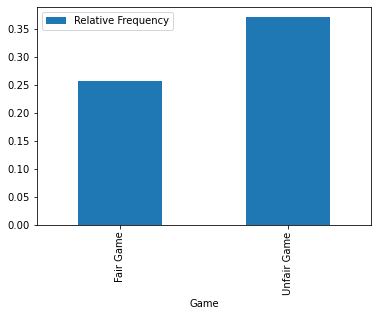

In [8]:
# Code blocks with output
# Create one fair coin (with faces H and T) and one unfair coin. For the unfair coin, give one of the faces a weight of 5 and the others 1
faces = ['H','T']
num_roll = 1000

#Fair Coin
fair_coin = Die(faces)
fair_coin_face_list = fair_coin.faces
fair_coin.show()

#Unfair Coin
unfair_coin = Die(faces)
unfair_coin_face_list = unfair_coin.faces
unfair_coin.change_weight('T',5)


# Play a game of 1000 flips of three coins with all fair dice
fair_coin_list = []
for i in range(3):
    fair_coin_list.append(fair_coin)

fair_game = Game(fair_coin_list)
fair_game.play(num_roll)
fair_game.show()

analyze_fair_game = Analyzer(fair_game.show())
fair_game_jackpot = analyze_fair_game.jackpot()
print("Number of jackpots for 3 fair dice : "+str(fair_game_jackpot))

#Relative frequency
fair_game_rf = fair_game_jackpot/num_roll

#---------------------#

# Play a game of 1000 flips with two unfair dice and one fair die - referred as unfair_game
unfair_coin_list = [fair_coin]
for i in range(2):
    unfair_coin_list.append(unfair_coin)

unfair_game = Game(unfair_coin_list)
unfair_game.play(num_roll)
unfair_game.show()

analyze_unfair_game = Analyzer(unfair_game.show())
unfair_game_jackpot = analyze_unfair_game.jackpot()
print("Number of jackpots for 2 unfair and 1 fair dice : "+str(unfair_game_jackpot))

#Relative frequency
unfair_game_rf = unfair_game_jackpot/num_roll

#Show your results, comparing the two relative frequencies, in a simple bar chart.
rf_df = pd.DataFrame()
df = pd.DataFrame({'Game':['Fair Game','Unfair Game'],'Relative Frequency':[fair_game_rf,unfair_game_rf]})
df = df.set_index('Game')
df.sort_index().plot.bar();

## Scenario 2

Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will weight 1 five times more than the others.
Play a game of 10000 rolls with 5 fair dice.
Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

Number of jackpots for 5 fair dice : 11
Number of jackpots for 2 unfair dice of type 1, 1 unfair die of type 2 and 1 fair dice : 69


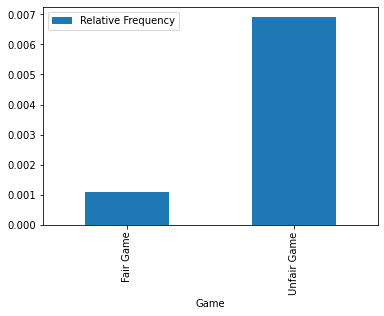

In [9]:
# Code blocks with output
faces = [1,2,3,4,5,6]
num_roll = 10000

#Fair Coin
fair_die = Die(faces)
fair_die_face_list = fair_die.faces
fair_die.show()

#Unfair Coin Type1
unfair_coin_type1 = Die(faces)
unfair_coin_face_list = unfair_coin_type1.faces
unfair_coin_type1.change_weight(6,5)

#Unfair Coin Type2
unfair_coin_type2 = Die(faces)
unfair_coin_face_list = unfair_coin_type2.faces
unfair_coin_type2.change_weight(1,5)

# Play a game of 10000 rolls with 5 fair dice.
fair_die_list = []
for i in range(5):
    fair_die_list.append(fair_die)

fair_game = Game(fair_die_list)
fair_game.play(num_roll)
fair_game.show()

analyze_fair_game = Analyzer(fair_game.show())
fair_game_jackpot = analyze_fair_game.jackpot()
print("Number of jackpots for 5 fair dice : "+str(fair_game_jackpot))

#Relative frequency
fair_game_rf = fair_game_jackpot/num_roll

#---------------------#

#Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
unfair_coin_list = [unfair_coin_type1,unfair_coin_type1,unfair_coin_type2,fair_die]

unfair_game = Game(unfair_coin_list)
unfair_game.play(num_roll)
unfair_game.show()

analyze_unfair_game = Analyzer(unfair_game.show())
unfair_game_jackpot = analyze_unfair_game.jackpot()
print("Number of jackpots for 2 unfair dice of type 1, 1 unfair die of type 2 and 1 fair dice : "+str(unfair_game_jackpot))

#Relative frequency
unfair_game_rf = unfair_game_jackpot/num_roll

#---------------------#

#For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
rf_df = pd.DataFrame()
df = pd.DataFrame({'Game':['Fair Game','Unfair Game'],'Relative Frequency':[fair_game_rf,unfair_game_rf]})
df = df.set_index('Game')
df.sort_index().plot.bar();


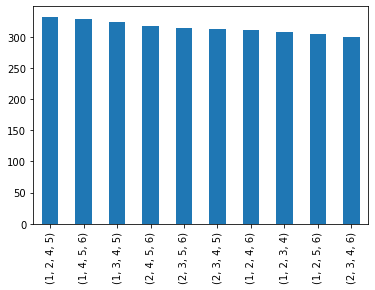

In [12]:
#Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.
def get10_freq_combo(df):
    face_combos = []
    for i in range(len(df)):
        face_combo = df.iloc[i]
        face_combos.append(tuple(face_combo.drop_duplicates().sort_values()))
    pd.Series(face_combos).value_counts()[:10].plot.bar()

fair_game_frequest_combos = get10_freq_combo(fair_game.show())

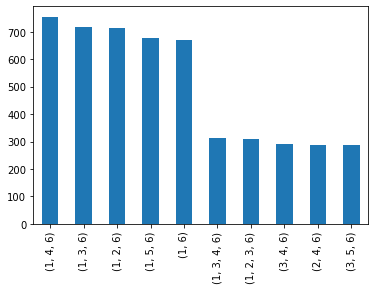

In [11]:
unfair_game_frequest_combos = get10_freq_combo(unfair_game.show())

## Scenario 3

Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.
Play a game involving 5 of these dice with 1000 rolls.
Generate 10 random samples of 10 from your data and count the number of times you see a word that looks like an English word in each sample. 
Keep a running count; this will result in an estimate of the percent of English words in the data. 

In [13]:
# Code blocks with output
import enchant

english_dict = enchant.Dict("en_US")

#Create a "die" of letters from a to z with weights based on their frequency of usage. weights from Appendix are stored in weights.csv
weights_df = pd.read_csv("weights.csv")
faces = list(weights_df['Alphabet'])


die = Die(faces)
die_face_list = die.faces

for i in range(len(weights_df)):
    die.change_weight(weights_df.iloc[i].Alphabet,weights_df.iloc[i].Weight)
die.show()

#Play a game involving 5 of these dice with 1000 rolls.
num_roll = 1000
die_list = []
for i in range(5):
    die_list.append(die)

game = Game(die_list)
game.play(num_roll)

# Generate 10 random samples of 10 from your data and count the number of times you see a word that looks like an English word in each sample. 

check_word = lambda word :english_dict.check(word)
word_count =0
words_list = []

for i in range(1,11):
    samples  = game.show().sample(10)
    words = samples.apply(''.join ,axis=1)
    for word in words:
        if check_word(word):
            words_list.append(word)
            word_count+=1
    
print("English words in data : "+str(word_count))
if word_count > 0:
    print(words_list)
    
print("Percentage of English words : "+str(word_count)+"%")

English words in data : 2
['PATES', 'CHINA']
Percentage of English words : 2%


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [14]:
!ls -lRF -o

.:
total 144
-rw-r--r-- 1 nyc2xu 26548 Nov 27 13:37 final-project-submission.ipynb
-rw-r--r-- 1 nyc2xu 66495 Nov 29 14:12 montecarlo_demo.ipynb
-rw-r--r-- 1 nyc2xu   957 Nov 27 13:37 montecarlo_test_results.txt
-rw-r--r-- 1 nyc2xu  2750 Nov 29 14:06 montecarlo_tests.py
drwxr-sr-x 4 nyc2xu  3072 Nov 29 14:05 pkg_mc/
drwxr-sr-x 3 nyc2xu  3072 Nov 29 14:01 pkg_mc.egg-info/
-rw-r--r-- 1 nyc2xu  6043 Nov 29 13:23 README.md
-rw-r--r-- 1 nyc2xu   318 Nov 27 13:37 setup.py
-rw-r--r-- 1 nyc2xu   278 Nov 29 11:15 weights.csv

./pkg_mc:
total 44
-rw-r--r-- 1 nyc2xu     0 Nov 27 13:37 __init__.py
-rw-r--r-- 1 nyc2xu   182 Nov 29 14:05 __init__.pyc
-rw-r--r-- 1 nyc2xu  8575 Nov 29 13:59 montecarlo.py
-rw-r--r-- 1 nyc2xu 10173 Nov 29 14:05 montecarlo.pyc
drwxr-sr-x 2 nyc2xu  1024 Nov 29 14:09 __pycache__/

./pkg_mc/__pycache__:
total 20
-rw-r--r-- 1 nyc2xu  186 Nov 29 13:56 __init__.cpython-38.pyc
-rw-r--r-- 1 nyc2xu 8569 Nov 29 14:09 montecarlo.cpython-38.pyc

./pkg_mc.egg-info:
total 20
-rw-r--r--

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [15]:
# Installation commands
!pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/nyc2xu/Documents/MSDS/DS5100/DS5100-2022-08-nyc2xu/Project
  Attempting uninstall: pkg-mc
    Found existing installation: pkg-mc 0.1
    Uninstalling pkg-mc-0.1:
      Successfully uninstalled pkg-mc-0.1
  Running setup.py develop for pkg-mc
